## Imports

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Versions of the Libraries

In [3]:
print('The numpy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The matplotlib version is {}.'.format(matplotlib.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

The numpy version is 1.21.5.
The pandas version is 1.4.4.
The matplotlib version is 3.5.2.
The seaborn version is 0.11.2.


## Importing the Dataset

In [4]:
#path = "Enter the path of the file here"
path = "C:\\Users\\ajati\\OneDrive\\Documents\\GitHub\\CreditScore Model\\Dataset\\Dataset.csv"

data = pd.read_csv(path)
print("Shape of the Dataset: {}".format(data.shape))
display(data.head())

Shape of the Dataset: (1000, 21)


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


## Improving Readability of Dataset

In [5]:
data['Account Balance'].replace([1,2,3,4], ['<0 DM', '<=0 & <200 DM', '>=200 DM', 'No Account'],inplace=True)
data['Payment Status of Previous Credit'].replace([0,1,2,3,4], ['No credit taken', 'Paid Up in this Bank','All Paid Up', 'Delayed', 'Pending Credit'],inplace=True)
data['Purpose'].replace([0,1,2,3,4,5,6,7,8,9,10],['New Car','Used Car', 'Furniture/ Equipment', 'Radio/ TV', 'Domestic Appliances', 'Repairs', 'Education', 'Vacation', 'Retraining', 'Business', 'Others'], inplace=True)
data['Value Savings/Stocks'].replace([1,2,3,4,5],['<100 DM', '100 - 500 DM','500 - 1000 DM', '>= 1000 DM','No Savings'],inplace=True)
data['Length of current employment'].replace([1,2,3,4,5],['Unemployed','<1 yr', '1 - 4 yr','4 - 7 yr', '>= 7 yr'],inplace=True)
data['Sex & Marital Status'].replace([1,2,3,4,5],['M, Divorced','F, Married/ Divorced', 'M, Single','M, Married', 'F, Single'],inplace=True)
data['Most valuable available asset'].replace([1,2,3,4],['Real Estate','Building/ Savings/ Life Insurance', 'Car etc','None'],inplace=True)
data['Concurrent Credits'].replace([1,2,3],['Bank','Stores', 'None'],inplace=True)
data['Guarantors'].replace([1,2,3],['None','Co-Applicant','Guarantor'], inplace=True)
data['Type of apartment'].replace([1,2,3],['Rent','Own', 'For Free'],inplace=True)
data['Occupation'].replace([1,2,3,4],['Unskilled - Non Resident','Unskilled - Resident', 'Skilled','Highly Skilled'],inplace=True)
data['Telephone'].replace([1,2],['No','Yes, Registered'],inplace=True)
data['Foreign Worker'].replace([1,2],['Yes','No'],inplace=True)

In [6]:
num_cols = ["Duration of Credit (month)", "Credit Amount", "Age (years)"]
cat_cols = [ x for x in data.columns if x not in num_cols]

## Distribution of Categorical Columns

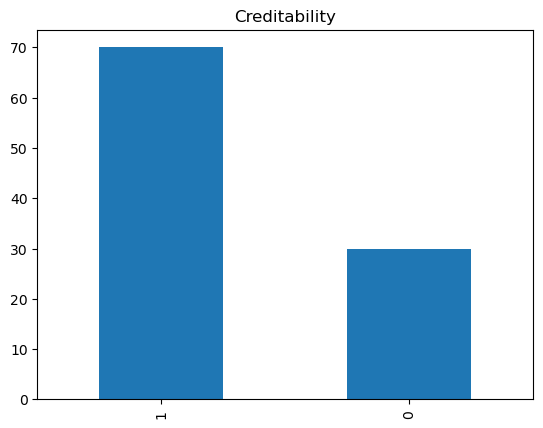

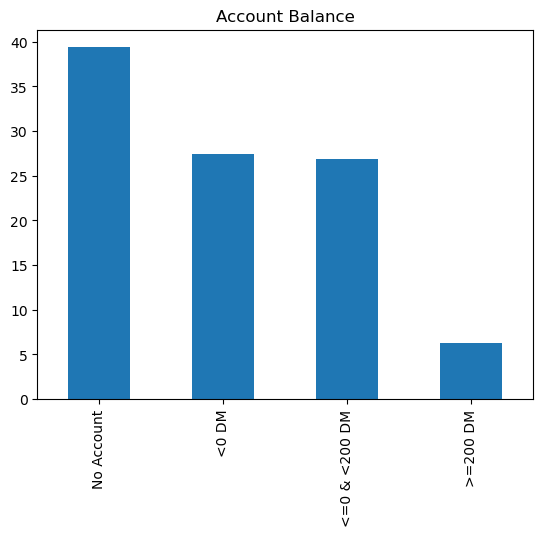

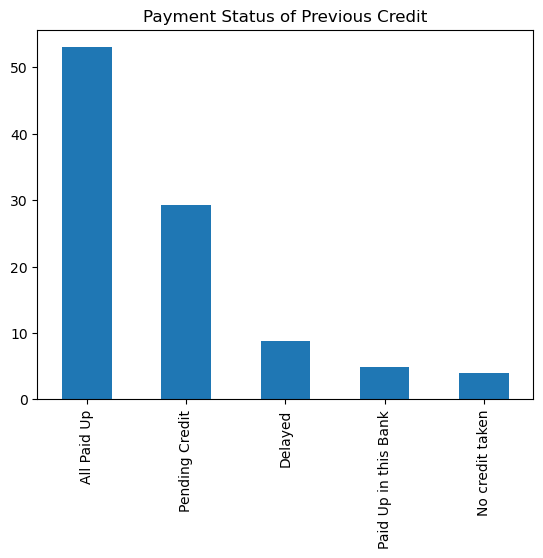

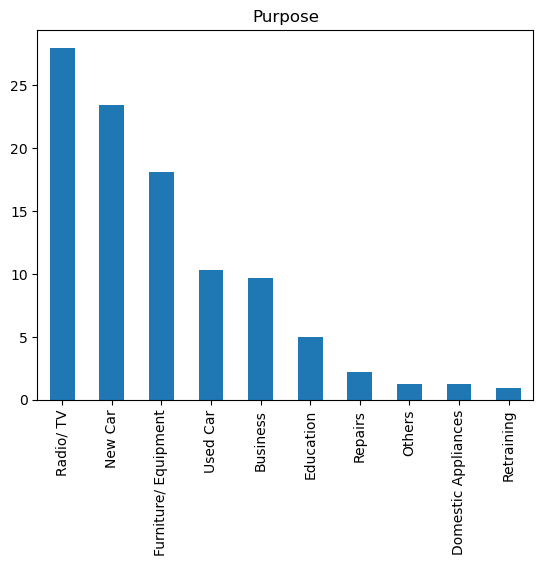

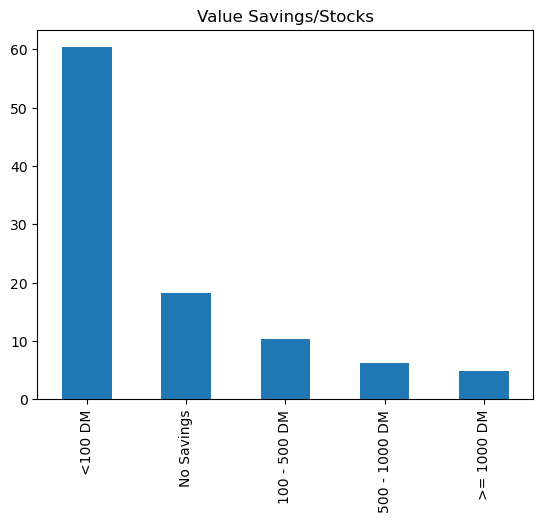

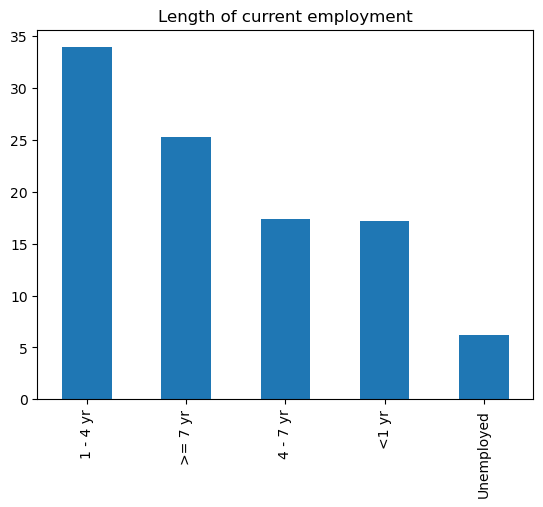

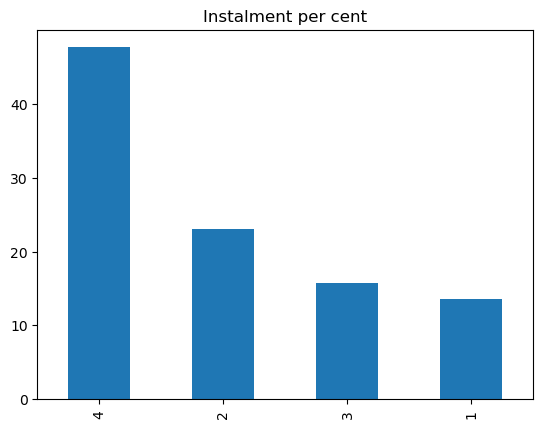

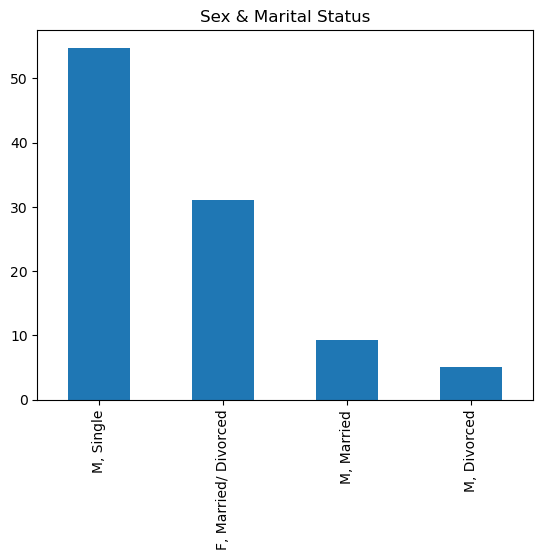

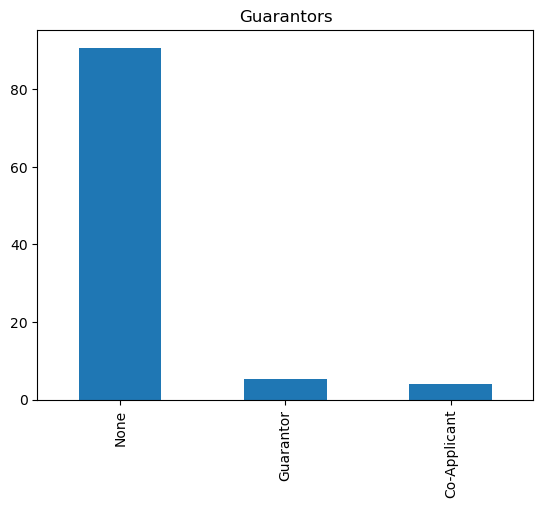

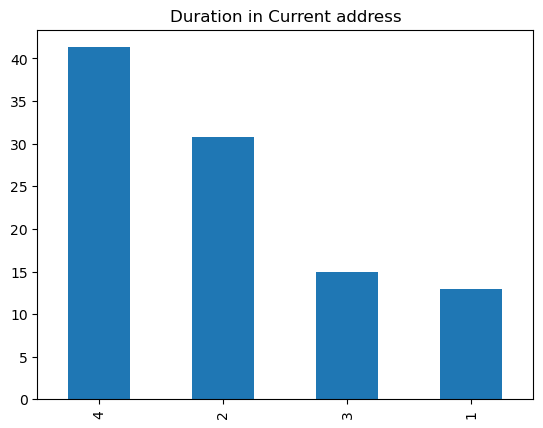

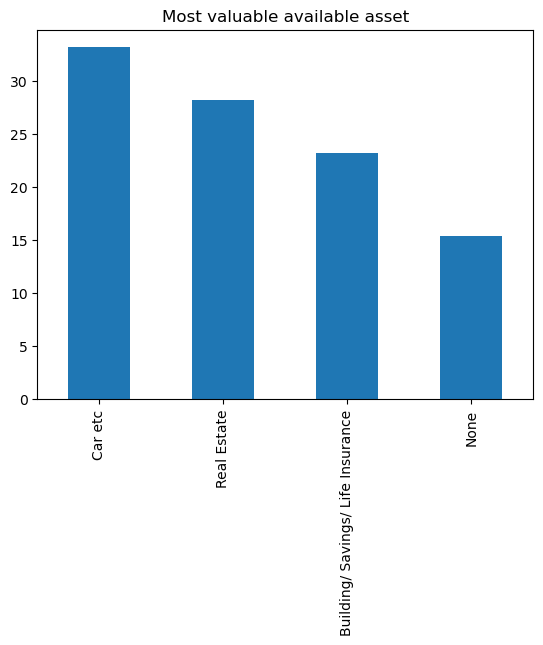

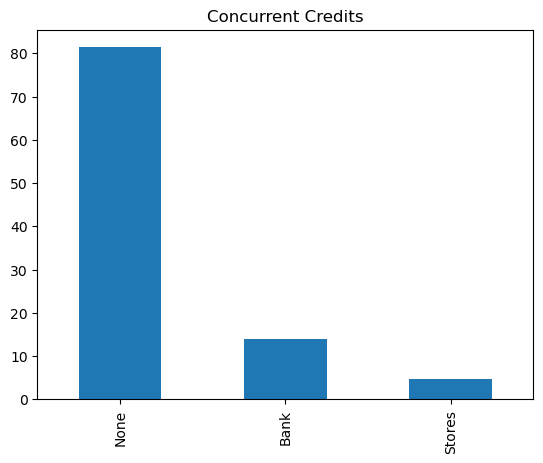

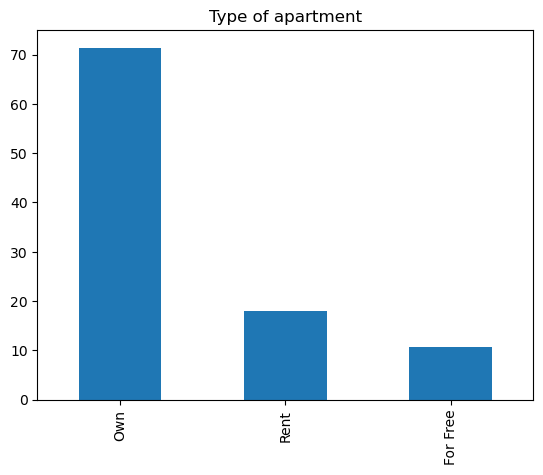

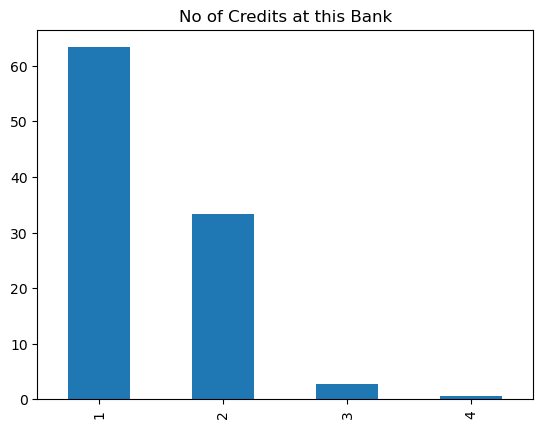

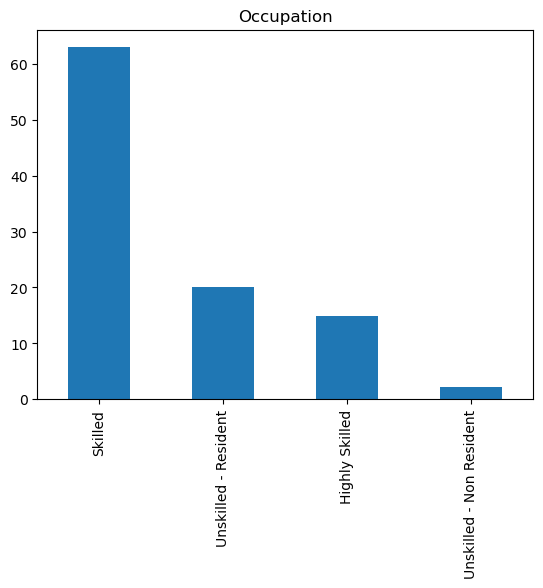

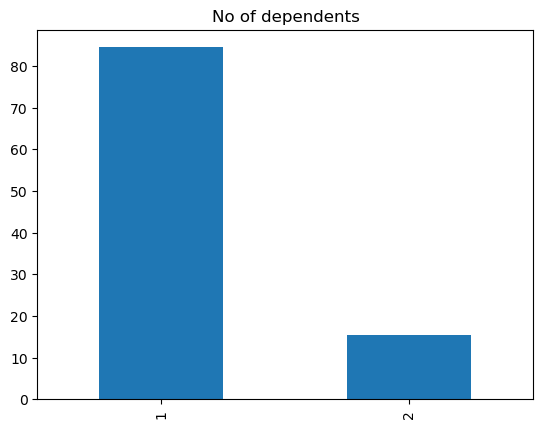

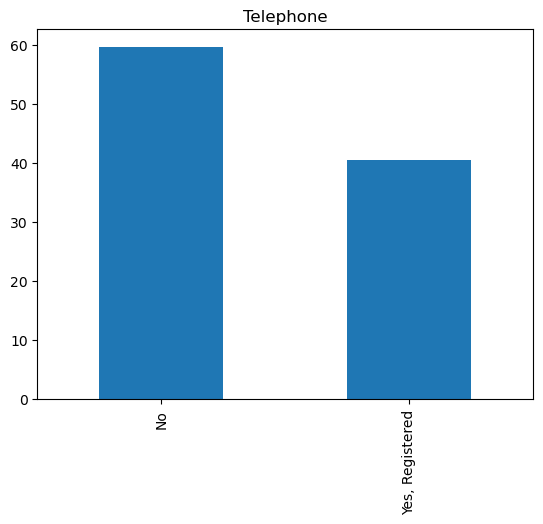

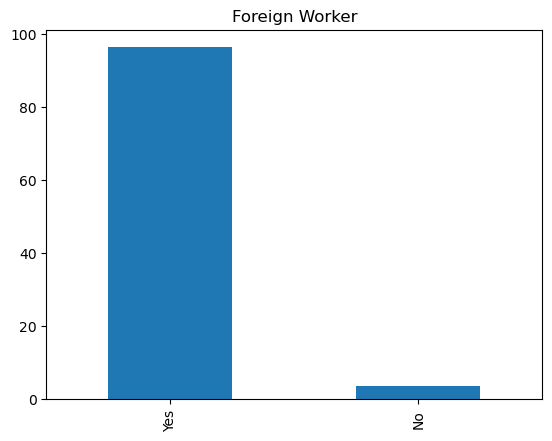

In [7]:
for i in cat_cols:
#     print(data[i].value_counts(normalize=True).mul(100).round(1).astype(str)+" %","\n")
    ax = data[i].value_counts(normalize=True).mul(100).round(1).plot.bar(title=i, y="%")
    plt.show()

## Distribution of Numerical Columns

Duration of Credit (month)


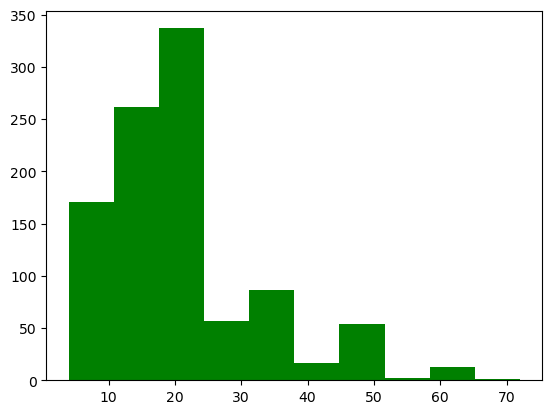

Credit Amount


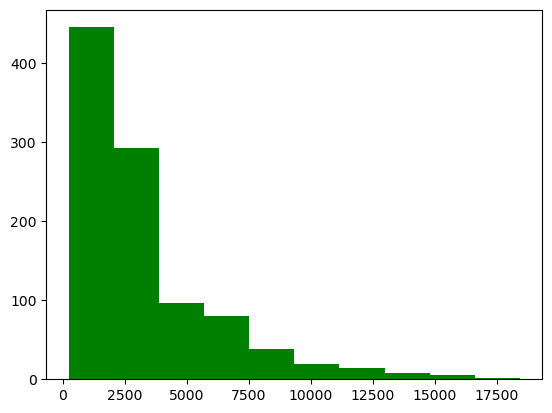

Age (years)


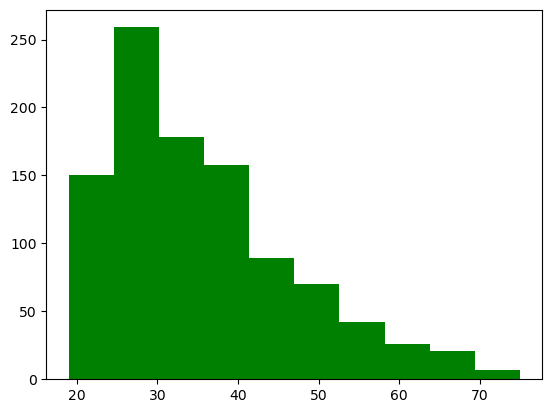

In [8]:
for i in num_cols:
    print("\033[1m"+i+"\033[0m")
    plt.hist(data[i], orientation = "vertical", color="green")
    plt.show()

## Contingency Table Between Predictors and Credibility

In [9]:
for i in [x for x in cat_cols if x != "Creditability"]:
    cont_table = pd.crosstab(data[i], data["Creditability"], margins = True, normalize="index").round(1)
    print(cont_table,"\n")

Creditability      0    1
Account Balance          
<0 DM            0.5  0.5
<=0 & <200 DM    0.4  0.6
>=200 DM         0.2  0.8
No Account       0.1  0.9
All              0.3  0.7 

Creditability                        0    1
Payment Status of Previous Credit          
All Paid Up                        0.3  0.7
Delayed                            0.3  0.7
No credit taken                    0.6  0.4
Paid Up in this Bank               0.6  0.4
Pending Credit                     0.2  0.8
All                                0.3  0.7 

Creditability           0    1
Purpose                       
Business              0.4  0.6
Domestic Appliances   0.3  0.7
Education             0.4  0.6
Furniture/ Equipment  0.3  0.7
New Car               0.4  0.6
Others                0.4  0.6
Radio/ TV             0.2  0.8
Repairs               0.4  0.6
Retraining            0.1  0.9
Used Car              0.2  0.8
All                   0.3  0.7 

Creditability           0    1
Value Savings/Stocks      

### Studying the Contingency Matrices we can conclude that the following predictors have significant effect on the Creditability of the consumers:

1. Account Balance
2. Payment Status of Previous Credit
3. Purpose
4. Value Savings/Stocks
5. Length of current emloyment
6. Most valuable available asset
7. Concurrent Credits
8. Type of apartment
9. Foreign Worker
10. Guarantors

## Studying Relative Distribution of Numeric Columns

In [49]:
def compare_num(target, num_cols):
    for i in num_cols:
        print("\033[1m"+i+"\033[0m")
        s1 = pd.Series(data[i][data[target]==1].describe().round(2), name = "Creditable")
        s2 = pd.Series(data[i][data[target]==0].describe().round(2), name = "Un-Creditable")
        s3 = pd.Series(((s2-s1).mul(200)/(s1+s2)), name="Percentage Difference")
        comp = pd.merge(s1, s2, right_index = True, left_index = True)
        comp_final = pd.merge(comp, s3, right_index = True, left_index = True)
        print(comp_final)
        plt.subplot(1,2,1)
        plt.hist(data[i][data[target]==1],color="green")
        plt.subplot(1,2,2)
        plt.hist(data[i][data[target]==0],color="red")
        plt.tight_layout()
        plt.show()

Duration of Credit (month)
       Creditable  Un-Creditable  Percentage Difference
count      700.00         300.00             -80.000000
mean        19.21          24.86              25.641026
std         11.08          13.28              18.062397
min          4.00           6.00              40.000000
25%         12.00          12.00               0.000000
50%         18.00          24.00              28.571429
75%         24.00          36.00              40.000000
max         60.00          72.00              18.181818


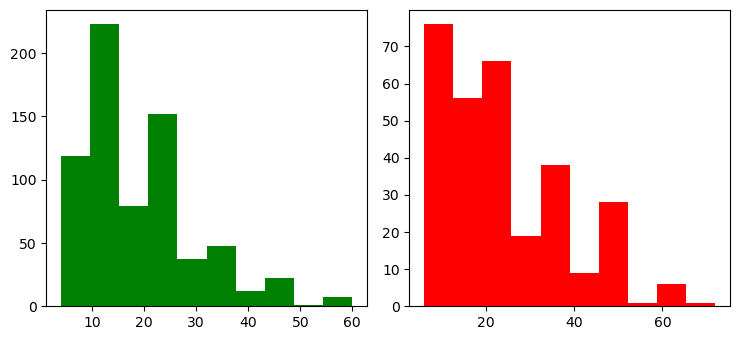

Credit Amount
       Creditable  Un-Creditable  Percentage Difference
count      700.00         300.00             -80.000000
mean      2985.44        3938.13              27.520196
std       2401.50        3535.82              38.209832
min        250.00         433.00              53.587116
25%       1375.50        1352.50              -1.686217
50%       2244.00        2574.50              13.717962
75%       3634.75        5141.50              34.336989
max      15857.00       18424.00              14.976226


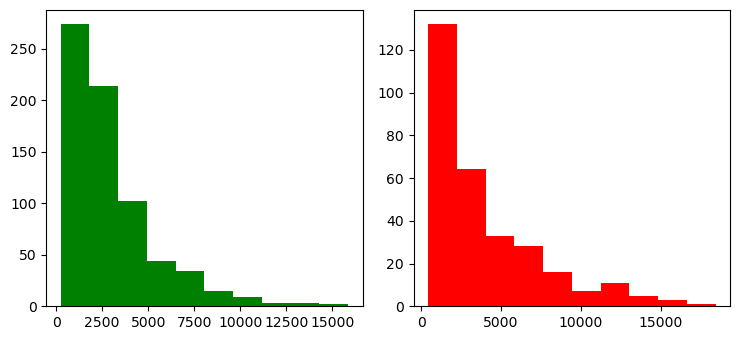

Age (years)
       Creditable  Un-Creditable  Percentage Difference
count      700.00         300.00             -80.000000
mean        36.22          33.96              -6.440581
std         11.35          11.23              -1.062888
min         19.00          19.00               0.000000
25%         27.00          25.00              -7.692308
50%         34.00          31.00              -9.230769
75%         42.00          40.00              -4.878049
max         75.00          74.00              -1.342282


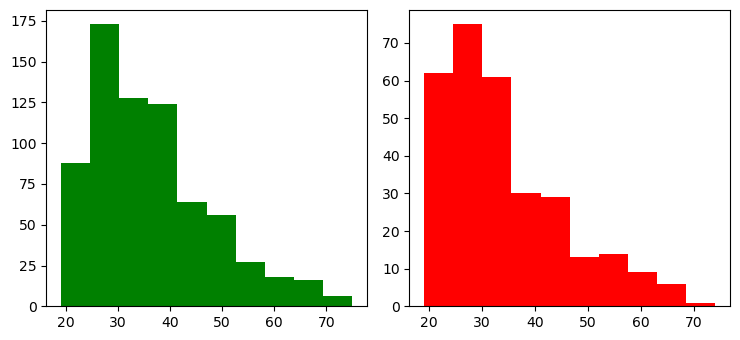

In [50]:
compare_num("Creditability",num_cols)

## Interpretation of the Exploratory Analysis

From the analysis we can infer that the data:
1. Consists of 1000 rows of Data
2. Contains 20 predictors
3. No column has any Missing Value

We can also infer that the following predictors have an impact on the Creditability of a client:

Categorical:
1. Account Balance
2. Payment Status of Previous Credit
3. Purpose
4. Value Savings/Stocks
5. Length of current emloyment
6. Most valuable available asset
7. Concurrent Credits
8. Type of apartment
9. Foreign Worker
10. Guarantors

Numerical:

11. Duration of credit
12. Credit Amount
